# Task 2
## Brain Tumor Detection using Keras and Pytorch


# Importing Modules

In [3]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

C:\Users\Dell\AppData\Local\Temp/ipykernel_28116/1535769414.py:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


## Building Model Using Keras
## Preparing The Data For Keras Model

In [5]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('C://Users//Dell//Downloads//Brain Tumor Detection//Training//')
path_test = ('C://Users//Dell//Downloads//Brain Tumor Detection//Testing//')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))


train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [6]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2870, 300, 300, 3)  and shape of test:  (394, 300, 300, 3)


## Augmenting The Data

In [7]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [8]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

## Some Visualizations

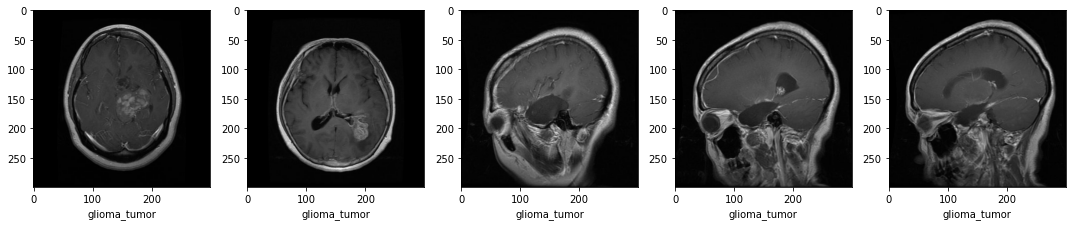

In [9]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

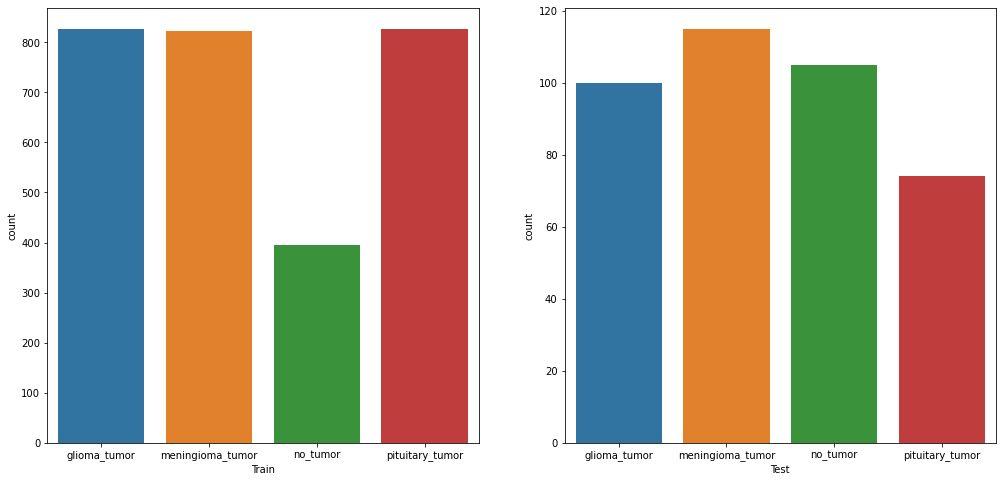

In [10]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [11]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    

In [12]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
81/81 [==============================] - 278s 3s/step - loss: 4.4501 - accuracy: 0.4661 - val_loss: 1.3030 - val_accuracy: 0.3589
Epoch 2/20
81/81 [==============================] - 266s 3s/step - loss: 0.9111 - accuracy: 0.5923 - val_loss: 1.2644 - val_accuracy: 0.3449
Epoch 3/20
81/81 [==============================] - 266s 3s/step - loss: 0.7866 - accuracy: 0.6624 - val_loss: 1.1060 - val_accuracy: 0.5540
Epoch 4/20
81/81 [==============================] - 262s 3s/step - loss: 0.6236 - accuracy: 0.7360 - val_loss: 0.7197 - val_accuracy: 0.7247
Epoch 5/20
81/81 [==============================] - 294s 4s/step - loss: 0.5227 - accuracy: 0.7824 - val_loss: 1.3201 - val_accuracy: 0.4808
Epoch 6/20
81/81 [==============================] - 262s 3s/step - loss: 0.4468 - accuracy: 0.8138 - val_loss: 0.9208 - val_accuracy: 0.6028
Epoch 7/20
81/81 [==============================] - 262s 3s/step - loss: 0.3464 - accuracy: 0.8614 - val_loss: 1.7056 - val_accuracy: 0.4599
Epoch 8/20
81

# Key Notes


Adding padding here to preserve the image shape

Adding maxpool layer to get those pixels which have the highest intensity. Reduces the image size by 2.

Took filters of 77 as image size if 300 300 thus it would help it to learn better.

Taken a dropout layer, to avoid overfitting.

The image from data generator is of type 'uint8', you need to type cast it to 'float32'.

In [13]:
model.layers[0].get_weights()[0].shape

(5, 5, 3, 32)

## Building The Model With Pytorch

## Preparing The Data For Pytorch Model

In [14]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

## Applying Data Transformations

In [15]:
transforming_img = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  
    transforms.Normalize([0.5,0.5,0.5], 
                        [0.5,0.5,0.5])
])

In [16]:
train_path = ('C://Users//Dell//Downloads//Brain Tumor Detection//Training//')
test_path = ('C://Users//Dell//Downloads//Brain Tumor Detection//Testing//')

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transforming_img),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transforming_img),
    batch_size=32, shuffle=True
)


#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [17]:
print(f'The classes are: {classes}')

The classes are: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [18]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [19]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()
        
         
        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()        
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)            
        output=output.view(-1,32*75*75)
        output=self.fc(output)
            
        return output
    
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   
model=ConvNet(num_classes=4).to(device)

In [20]:
for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

In [21]:
images.shape

torch.Size([54, 3, 150, 150])

In [22]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()



best_accuracy=0.0

for epoch in range(20):
    
    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        optimizer.zero_grad()
        
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        
        train_accuracy+=int(torch.sum(prediction==labels.data))
        
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    
    
    # Evaluation on testing dataset
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
            
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    
    test_accuracy=test_accuracy/test_count
    
    
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy

Epoch: 0 Train Loss: tensor(9.1178) Train Accuracy: 0.5641114982578397 Test Accuracy: 0.5
Epoch: 1 Train Loss: tensor(1.9739) Train Accuracy: 0.7672473867595819 Test Accuracy: 0.5152284263959391
Epoch: 2 Train Loss: tensor(1.0709) Train Accuracy: 0.8313588850174216 Test Accuracy: 0.6091370558375635
Epoch: 3 Train Loss: tensor(0.4411) Train Accuracy: 0.9048780487804878 Test Accuracy: 0.6421319796954315
Epoch: 4 Train Loss: tensor(0.8299) Train Accuracy: 0.8686411149825783 Test Accuracy: 0.6421319796954315
Epoch: 5 Train Loss: tensor(0.3040) Train Accuracy: 0.9344947735191638 Test Accuracy: 0.6903553299492385
Epoch: 6 Train Loss: tensor(0.2968) Train Accuracy: 0.943205574912892 Test Accuracy: 0.733502538071066
Epoch: 7 Train Loss: tensor(0.2157) Train Accuracy: 0.9484320557491289 Test Accuracy: 0.6802030456852792
Epoch: 8 Train Loss: tensor(0.1941) Train Accuracy: 0.9592334494773519 Test Accuracy: 0.6675126903553299
Epoch: 9 Train Loss: tensor(0.1589) Train Accuracy: 0.9651567944250871 T